In [29]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings("ignore")

df_steam = pd.read_csv(r'C:\Users\Admin\Downloads\Primer Proyecto\DS\steam_games_clean.csv')

df_reviews = pd.read_csv(r'C:\Users\Admin\Downloads\Primer Proyecto\DS\user_reviews_clean.csv')

df_items = pd.read_csv(r'C:\Users\Admin\Downloads\Primer Proyecto\DS\user_items_clean.csv')

In [23]:
#Averiguamos los 3 juegos mas recomendados.

# Filtramos solo las filas con recommend=True
df_reviews_true = df_reviews[df_reviews['recommend']]

#Contamos la cantidad de recomendaciones por item_id
recomendaciones_por_item = df_reviews_true.groupby('item_id')['recommend'].count().reset_index()

#Ordenamos en orden descendente
recomendaciones_por_item = recomendaciones_por_item.sort_values(by='recommend', ascending=False)

#Tomamos los tres primeros ítems
top_3_recomendados = recomendaciones_por_item.head(3)

#Combinamos con df_steam para obtener los nombres de los ítems
top_3_mas_recomendados = pd.merge(top_3_recomendados, df_steam[['id', 'title']], left_on='item_id', right_on='id', how='left')


print(top_3_mas_recomendados )

   item_id  recommend    id                             title
0      440       3611   440                   team fortress 2
1      440       3611   440                   team fortress 2
2      730       3478   730  counter-strike: global offensive
3     4000       1685  4000                       garry's mod
4     4000       1685  4000                       garry's mod


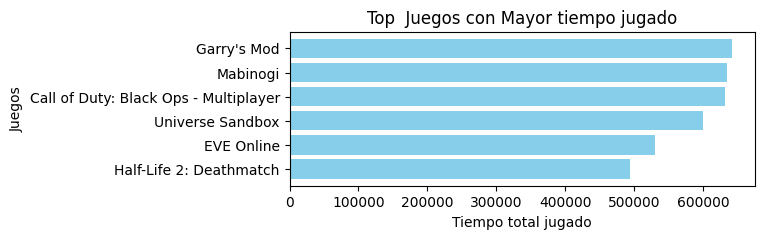

In [24]:
import matplotlib.pyplot as plt
#Informaremos los juegos con mayor tiempo jugado
top_juegos_jugados = df_items.sort_values(by='playtime_forever', ascending=False).head(10)
plt.figure(figsize=(6, 2))  # Ajusta el tamaño del gráfico..

# Graficar los datos
plt.barh(top_juegos_jugados['item_name'], top_juegos_jugados['playtime_forever'], color='skyblue')
plt.xlabel('Tiempo total jugado')  # Etiqueta del eje X
plt.ylabel('Juegos')         # Etiqueta del eje Y
plt.title('Top  Juegos con Mayor tiempo jugado')  # Título del gráfico

plt.gca().invert_yaxis()  # Invertir el eje Y para que el juego con más tiempo jugado esté en la parte superior.

# Mostrar el gráf

In [26]:
#Veremos en que año se lanzaron mas juegos 

# Copia el DataFrame original df_steam
df_steam_copia = df_steam.copy()

# Realiza el cálculo de la cantidad de juegos lanzados por mes
cantidad_juegos_por_mes = df_steam_copia.groupby('release_year').size().reset_index(name='cantidad_juegos')

# Ahora tienes la cantidad de juegos lanzados por mes en el DataFrame cantidad_juegos_por_mes
print(cantidad_juegos_por_mes)

      release_year  cantidad_juegos
0             1983                3
1             1984                5
2             1985                1
3             1986                5
4             1987                5
5             1988                9
6             1989               11
7             1990               14
8             1991               22
9             1992               24
10            1993               40
11            1994               52
12            1995               49
13            1996               56
14            1997               64
15            1998               75
16            1999               80
17            2000               55
18            2001              109
19            2002               62
20            2003              118
21            2004               92
22            2005              139
23            2006              217
24            2007              259
25            2008              332
26            2009          

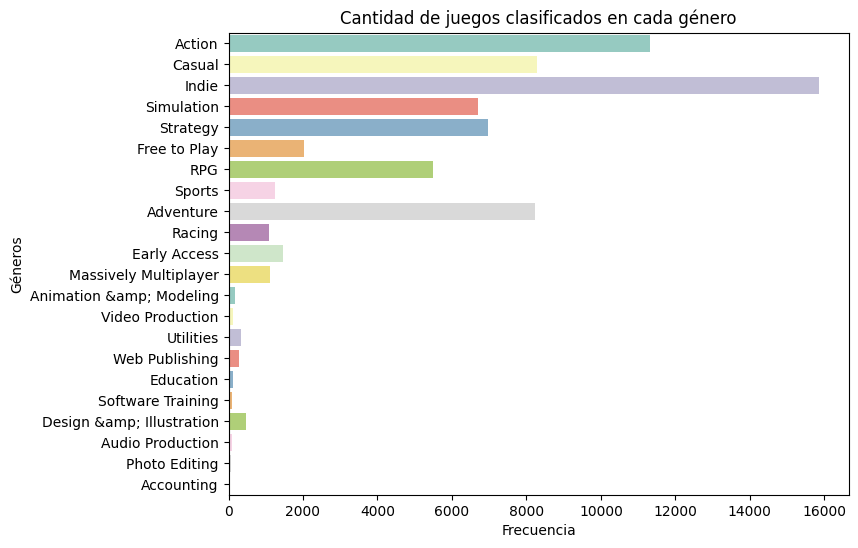

In [30]:
# Estilo
sns.set_palette("pastel")

# Count-plot de la columna 'genres'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_steam, y='genres', orient='h', palette='Set3')
plt.title('Cantidad de juegos clasificados en cada género')
plt.xlabel('Frecuencia')
plt.ylabel('Géneros')
plt.show()

In [33]:
def porcentaje(df, columna):
    # Cuenta la cantidad de True/False luego calcula el porcentaje
    counts = df[columna].value_counts()
    percentages = round(100 * counts / len(df),2)
    # Crea un dataframe con el resumen
    df_resultado = pd.DataFrame({
        "Cantidad": counts,
        "Porcentaje": percentages
    })
    return df_resultado

porcentaje(df_steam, 'release_year')[:5]

,Cantidad,Porcentaje
release_year,,
2017,24967,34.89
2016,17667,24.69
2015,12256,17.13
2014,6341,8.86
2013,3016,4.22


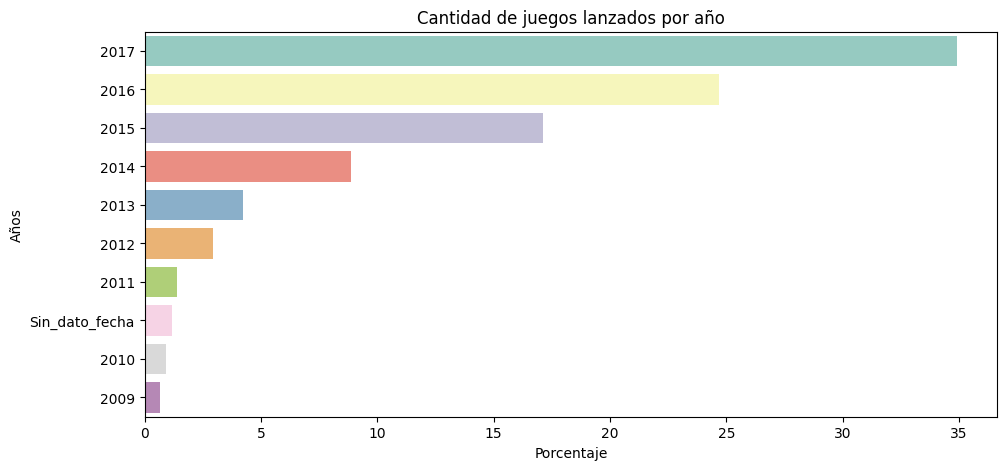

In [34]:
# Estilo
sns.set_palette("pastel")

df_porcentaje = porcentaje(df_steam, 'release_year')[:10]

# Crear el count plot con el eje X mostrando el porcentaje
plt.figure(figsize=(11, 5))
sns.barplot(data=df_porcentaje, x='Porcentaje', y='release_year', orient='h', palette='Set3')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Porcentaje')
plt.ylabel('Años')
plt.show()